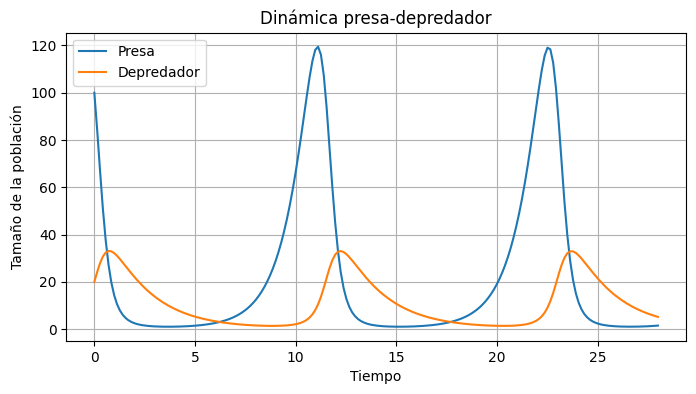

In [72]:
#Importando las librerías necesarias
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Parámetros
alpha = 1.00
beta = 0.10
delta = 0.02
gamma = 0.50

# Sistema de ecuaciones diferenciales
def lv_system(t, vars):
  x, y = vars
  dxdt = alpha*x - beta*x*y
  dydt = delta*x*y - gamma*y
  return [dxdt, dydt]

# Condiciones iniciales
x0 = 100
y0 = 20
initial_conditions = [x0, y0]

# Intervalo de tiempo para la simulación
time_span = (0, 28)
t_eval = np.linspace(*time_span, 200)

# Resolver el sistema de ecuaciones diferenciales
ref_solution = solve_ivp(lv_system, time_span, initial_conditions, t_eval=t_eval, method='LSODA')

# Extraer la solución para cada variable
t_values = ref_solution.t
x_values = ref_solution.y[0]
y_values = ref_solution.y[1]

# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(t_values, x_values, label='Presa')
plt.plot(t_values, y_values, label='Depredador')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la población')
plt.title('Dinámica presa-depredador')
plt.legend()
plt.grid()
plt.show()

In [73]:
#Convertimos a tensores
t_values = torch.tensor(t_values, dtype=torch.float32).view(-1, 1)
x_values = torch.tensor(x_values, dtype=torch.float32).view(-1, 1)
y_values = torch.tensor(y_values, dtype=torch.float32).view(-1, 1)

In [74]:
# Datos observacionales ruidosos
torch.manual_seed(10)

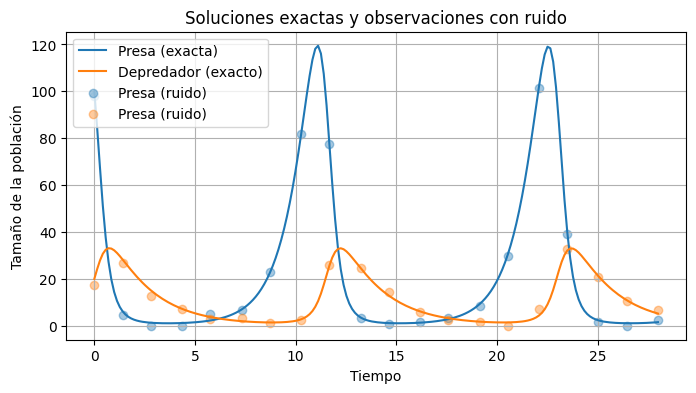

In [75]:
# Número de muestras equiespaciadas
n_obs = 20

# Índices equiespaciados
idx_obs = torch.linspace(0, t_values.shape[0] - 1, steps=n_obs).long()
t_obs = t_values[idx_obs]  # Tiempos observacionales

# Extraemos los valores exactos de x e y en esos tiempos
x_obs = x_values[idx_obs]
y_obs = y_values[idx_obs]

# Añadimos ruido gaussiano (media 0, desviación 0.1)
sigma_x = 0.1 * x_obs.mean()
sigma_y = 0.1 * y_obs.mean()
x_obs_r = torch.clamp(x_obs + sigma_x * torch.randn_like(x_obs), min=0.0)
y_obs_r = torch.clamp(y_obs + sigma_y * torch.randn_like(y_obs), min=0.0)

#visualización
plt.figure(figsize=(8, 4))
plt.plot(t_values, x_values, label='Presa (exacta)')
plt.plot(t_values, y_values, label='Depredador (exacto)')
plt.scatter(t_obs, x_obs_r, label="Presa (ruido)", alpha=0.4)
plt.scatter(t_obs, y_obs_r, label="Presa (ruido)", alpha=0.4)
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la población')
plt.title("Soluciones exactas y observaciones con ruido")
plt.legend()
plt.grid()
plt.show()


In [76]:
# Red neuronal
class FCN(nn.Module):
    def __init__(self, n_input, n_output, n_hidden, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[nn.Linear(n_input, n_hidden),activation()])
        self.fch = nn.Sequential(*[nn.Sequential(*[nn.Linear(n_hidden, n_hidden),activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

Paso 0: Total = 1234.547729 | BC = 10345.491211 | Física = 0.071971 | Observaciones = 1999.265137


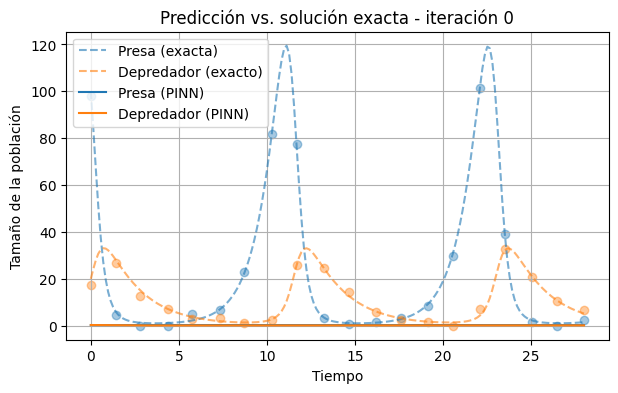

Paso 500: Total = 768.919189 | BC = 6374.689941 | Física = 1.007784 | Observaciones = 1304.424072
Paso 1000: Total = 548.906616 | BC = 4276.604980 | Física = 3.222964 | Observaciones = 1180.231445
Paso 1500: Total = 382.118134 | BC = 2749.590332 | Física = 5.069722 | Observaciones = 1020.893494
Paso 2000: Total = 247.969971 | BC = 1664.192627 | Física = 5.308164 | Observaciones = 762.425293
Paso 2500: Total = 162.361160 | BC = 927.841248 | Física = 5.915877 | Observaciones = 636.611572


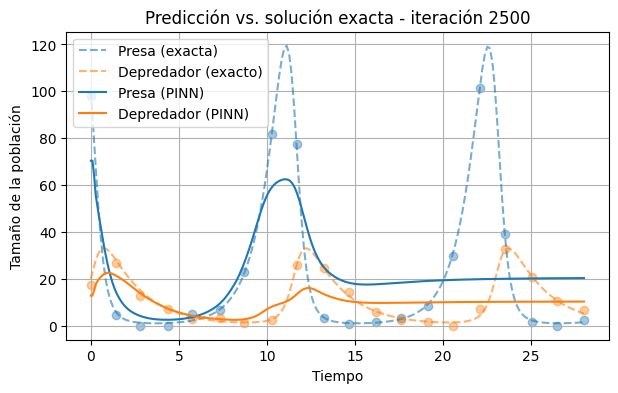

Paso 3000: Total = 104.420326 | BC = 479.399292 | Física = 5.094505 | Observaciones = 513.858887
Paso 3500: Total = 67.834503 | BC = 182.578873 | Física = 2.145463 | Observaciones = 474.311523
Paso 4000: Total = 51.403561 | BC = 57.743992 | Física = 2.280041 | Observaciones = 433.491211
Paso 4500: Total = 38.211040 | BC = 13.030594 | Física = 1.731543 | Observaciones = 351.764374
Paso 5000: Total = 31.563707 | BC = 1.991216 | Física = 1.655095 | Observaciones = 297.094910


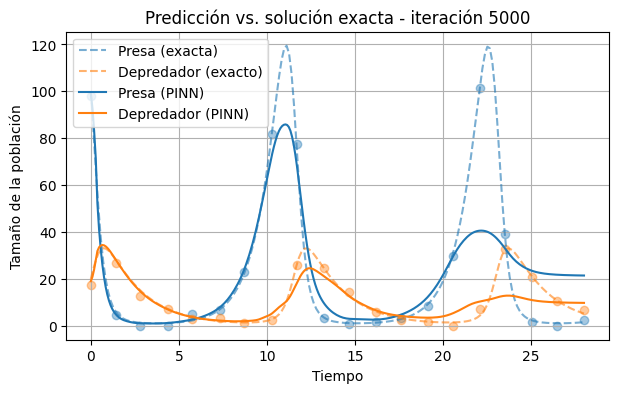

Paso 5500: Total = 26.899313 | BC = 0.523927 | Física = 1.650239 | Observaciones = 251.966812
Paso 6000: Total = 21.992519 | BC = 0.984625 | Física = 1.775595 | Observaciones = 201.184616
Paso 6500: Total = 19.989622 | BC = 1.493530 | Física = 1.945634 | Observaciones = 178.946350
Paso 7000: Total = 16.940262 | BC = 0.344725 | Física = 1.921816 | Observaciones = 149.839737
Paso 7500: Total = 13.855476 | BC = 0.271174 | Física = 1.691368 | Observaciones = 121.369904


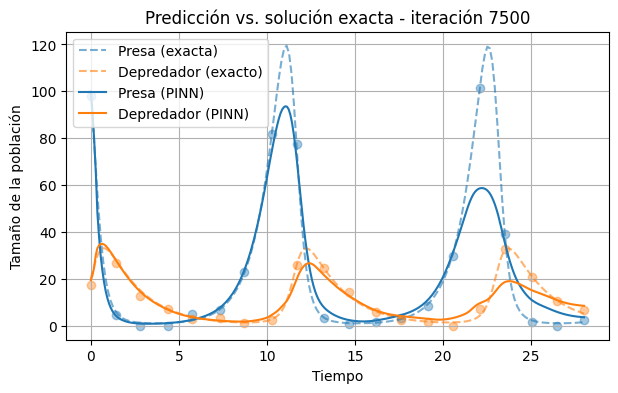

Paso 8000: Total = 11.620507 | BC = 0.051758 | Física = 1.539639 | Observaciones = 100.756920
Paso 8500: Total = 9.202871 | BC = 0.041866 | Física = 1.433959 | Observaciones = 77.647255
Paso 9000: Total = 7.205960 | BC = 0.045235 | Física = 1.384632 | Observaciones = 58.168041
Paso 9500: Total = 5.848441 | BC = 0.057150 | Física = 1.400254 | Observaciones = 44.424725
Paso 10000: Total = 4.829578 | BC = 0.028785 | Física = 1.363189 | Observaciones = 34.635101


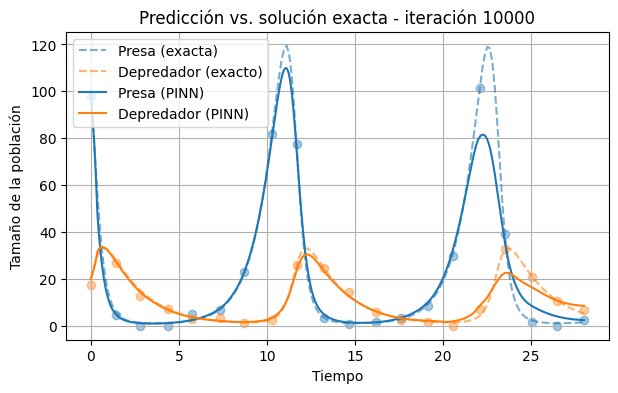

Paso 10500: Total = 4.036354 | BC = 0.025974 | Física = 1.307056 | Observaciones = 27.267002
Paso 11000: Total = 3.383762 | BC = 0.026403 | Física = 1.216826 | Observaciones = 21.642960
Paso 11500: Total = 2.847231 | BC = 0.021211 | Física = 1.112648 | Observaciones = 17.324619
Paso 12000: Total = 2.397011 | BC = 0.024851 | Física = 0.989025 | Observaciones = 14.055009
Paso 12500: Total = 2.011495 | BC = 0.023878 | Física = 0.852351 | Observaciones = 11.567558


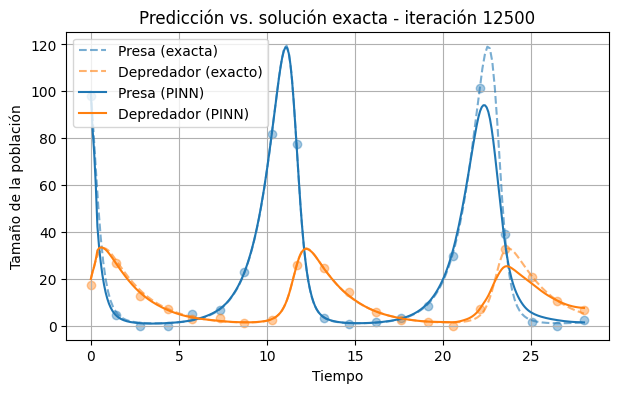

Paso 13000: Total = 1.689639 | BC = 0.023556 | Física = 0.721663 | Observaciones = 9.656206
Paso 13500: Total = 1.668132 | BC = 0.022022 | Física = 0.813438 | Observaciones = 8.524918
Paso 14000: Total = 1.202161 | BC = 0.023442 | Física = 0.500887 | Observaciones = 6.989296
Paso 14500: Total = 1.016926 | BC = 0.021987 | Física = 0.419812 | Observaciones = 5.949150
Paso 15000: Total = 0.877177 | BC = 0.023032 | Física = 0.353973 | Observaciones = 5.209014


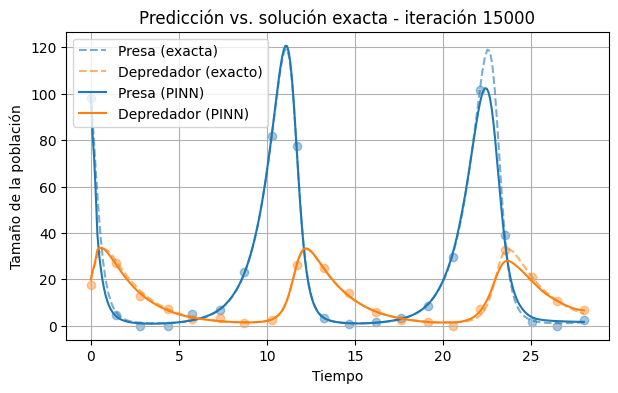

Paso 15500: Total = 0.770650 | BC = 0.022901 | Física = 0.315357 | Observaciones = 4.530028
Paso 16000: Total = 0.789892 | BC = 0.040100 | Física = 0.368244 | Observaciones = 4.176389
Paso 16500: Total = 0.609109 | BC = 0.023408 | Física = 0.237911 | Observaciones = 3.688575
Paso 17000: Total = 0.553473 | BC = 0.023672 | Física = 0.211759 | Observaciones = 3.393463
Paso 17500: Total = 0.507996 | BC = 0.023589 | Física = 0.192371 | Observaciones = 3.132662


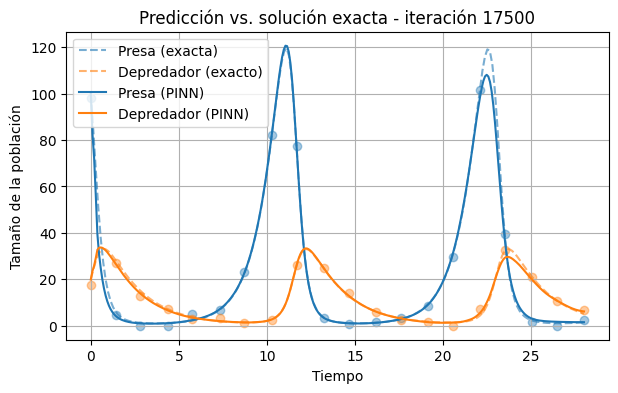

Paso 18000: Total = 0.554874 | BC = 0.019789 | Física = 0.262936 | Observaciones = 2.899595
Paso 18500: Total = 0.435346 | BC = 0.024153 | Física = 0.152882 | Observaciones = 2.800484
Paso 19000: Total = 0.407986 | BC = 0.023734 | Física = 0.138838 | Observaciones = 2.667752
Paso 19500: Total = 0.415304 | BC = 0.024322 | Física = 0.160048 | Observaciones = 2.528237
Paso 20000: Total = 0.422021 | BC = 0.026099 | Física = 0.176232 | Observaciones = 2.431791


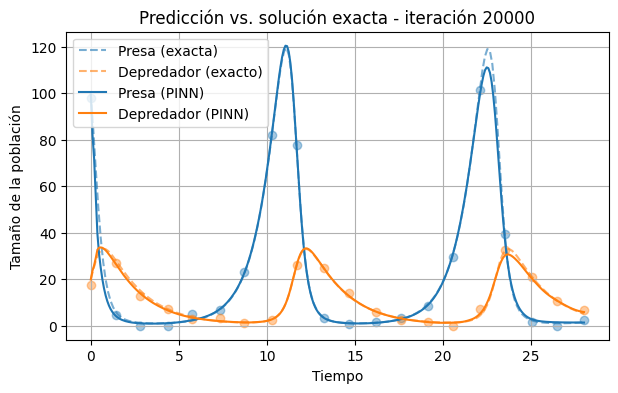

Paso 20500: Total = 0.366459 | BC = 0.023751 | Física = 0.121726 | Observaciones = 2.423584
Paso 21000: Total = 0.337197 | BC = 0.023140 | Física = 0.099633 | Observaciones = 2.352503
Paso 21500: Total = 0.326574 | BC = 0.029753 | Física = 0.095694 | Observaciones = 2.279038
Paso 22000: Total = 0.310382 | BC = 0.024212 | Física = 0.083774 | Observaciones = 2.241868
Paso 22500: Total = 0.307354 | BC = 0.021842 | Física = 0.085635 | Observaciones = 2.195343


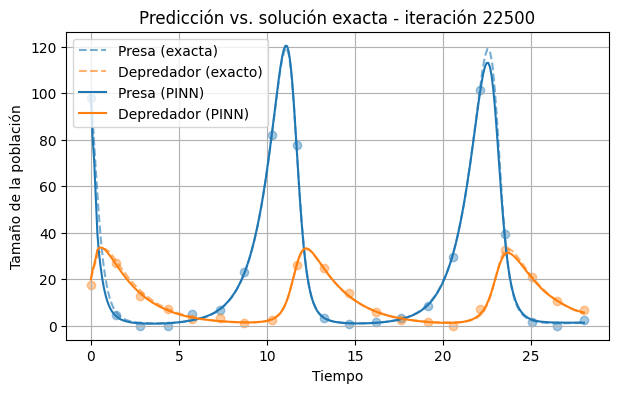

Paso 23000: Total = 0.292582 | BC = 0.023559 | Física = 0.073182 | Observaciones = 2.170436
Paso 23500: Total = 0.517445 | BC = 0.051257 | Física = 0.243132 | Observaciones = 2.691876
Paso 24000: Total = 0.329607 | BC = 0.029132 | Física = 0.103565 | Observaciones = 2.231289
Paso 24500: Total = 0.273907 | BC = 0.023570 | Física = 0.061192 | Observaciones = 2.103583
Paso 25000: Total = 0.274223 | BC = 0.023050 | Física = 0.062416 | Observaciones = 2.095020


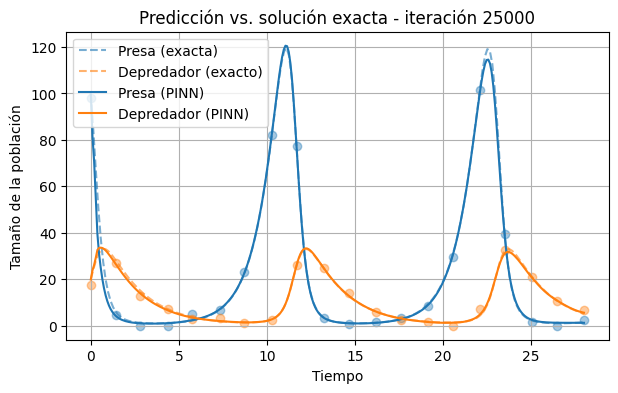

Paso 25500: Total = 0.310893 | BC = 0.022195 | Física = 0.103787 | Observaciones = 2.048859
Paso 26000: Total = 0.310364 | BC = 0.025992 | Física = 0.092668 | Observaciones = 2.150963
Paso 26500: Total = 0.265998 | BC = 0.022480 | Física = 0.059805 | Observaciones = 2.039448
Paso 27000: Total = 0.262899 | BC = 0.026687 | Física = 0.055676 | Observaciones = 2.045552
Paso 27500: Total = 0.259159 | BC = 0.023429 | Física = 0.054517 | Observaciones = 2.022993


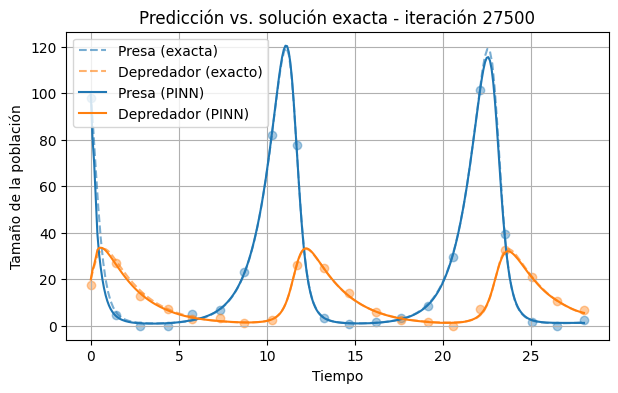

Paso 28000: Total = 0.265698 | BC = 0.024814 | Física = 0.059861 | Observaciones = 2.033558
Paso 28500: Total = 0.265063 | BC = 0.019161 | Física = 0.058910 | Observaciones = 2.042370
Paso 29000: Total = 0.302322 | BC = 0.018118 | Física = 0.077224 | Observaciones = 2.232862
Paso 29500: Total = 0.243043 | BC = 0.021744 | Física = 0.039060 | Observaciones = 2.018086
Paso 30000: Total = 0.241982 | BC = 0.024231 | Física = 0.038147 | Observaciones = 2.014112


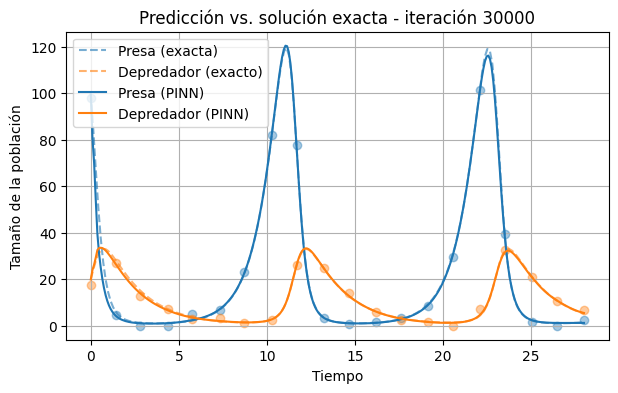

In [82]:
# Inicialización
pinn = FCN(1, 2, 32, 3)
optimizer = torch.optim.Adam(pinn.parameters(), lr=1e-3)

lambda_bc = 0.1
lambda_phys = 1
lambda_obs = 0.1

t_boundary = torch.tensor([[0.0]], requires_grad=True)
t_physics = torch.tensor(ref_solution.t, dtype=torch.float32).view(-1, 1).requires_grad_(True)
t_test = torch.linspace(time_span[0], time_span[1], 300).view(-1, 1)

loss_total_list, loss_bc_list, loss_phys_list, loss_obs_list = [], [], [], []

for i in range(30001):
    optimizer.zero_grad()

    # Condiciones iniciales
    pred0 = pinn(t_boundary)
    x0_pred = pred0[:, 0]
    y0_pred = pred0[:, 1]
    loss_bc = (x0_pred - x0)**2 + (y0_pred - y0)**2

    # Predicciones para condiciones físicas
    pred_physics = pinn(t_physics)
    x_pred_phys = pred_physics[:, 0].view(-1, 1)
    y_pred_phys = pred_physics[:, 1].view(-1, 1)

    # Derivadas respecto al tiempo
    dxdt_pred = torch.autograd.grad(x_pred_phys, t_physics, torch.ones_like(x_pred_phys), create_graph=True)[0]
    dydt_pred = torch.autograd.grad(y_pred_phys, t_physics, torch.ones_like(y_pred_phys), create_graph=True)[0]

    # Pérdidas de las ODE
    ode1_residual = dxdt_pred - (alpha * x_pred_phys - beta * x_pred_phys * y_pred_phys)
    ode2_residual = dydt_pred - (delta * x_pred_phys * y_pred_phys - gamma * y_pred_phys)

    loss_phys = torch.mean(ode1_residual**2) + torch.mean(ode2_residual**2)

    # Predicción en observaciones
    pred_obs = pinn(t_obs)
    x_pred_obs = pred_obs[:, 0]
    y_pred_obs = pred_obs[:, 1]

    # Pérdida observacional
    loss_obs = torch.mean((x_pred_obs - x_obs_r.squeeze())**2) + torch.mean((y_pred_obs - y_obs_r.squeeze())**2)

    # Pérdida total
    loss = lambda_bc * loss_bc + lambda_phys * loss_phys + lambda_obs * loss_obs
    loss.backward()
    optimizer.step()

    loss_total_list.append(loss.item())
    loss_bc_list.append(loss_bc.item())
    loss_phys_list.append(loss_phys.item())
    loss_obs_list.append(loss_obs.item())

    if i % 500 == 0:
        print(f"Paso {i}: Total = {loss.item():.6f} | BC = {loss_bc.item():.6f} | Física = {loss_phys.item():.6f} | Observaciones = {loss_obs.item():.6f}")

    if i % 2500 == 0:
        with torch.no_grad():
            pred_test = pinn(t_test)
            x_pred_test = pred_test[:, 0].numpy()
            y_pred_test = pred_test[:, 1].numpy()

            plt.figure(figsize=(7, 4))
            # Graficamos la solución exacta
            plt.plot(t_values.squeeze().numpy(), x_values.squeeze().numpy(), '--', color ='tab:blue', label='Presa (exacta)', alpha=0.6)
            plt.plot(t_values.squeeze().numpy(), y_values.squeeze().numpy(),  '--', color ='tab:orange', label='Depredador (exacto)', alpha=0.6)
            # Graficamos la predicción del PINN
            plt.plot(t_test.squeeze().numpy(), x_pred_test, color = 'tab:blue', label='Presa (PINN)')
            plt.plot(t_test.squeeze().numpy(), y_pred_test, color='tab:orange', label='Depredador (PINN)')
            # Graficamos los datos observados con ruido
            plt.scatter(t_obs.squeeze().detach().numpy(), x_obs_r.squeeze().detach().numpy(), color='tab:blue', alpha=0.4)
            plt.scatter(t_obs.squeeze().detach().numpy(), y_obs_r.squeeze().detach().numpy(), color='tab:orange', alpha=0.4)

            plt.xlabel("Tiempo")
            plt.ylabel("Tamaño de la población")
            plt.title(f"Predicción vs. solución exacta - iteración {i}")
            plt.legend(loc='best')
            plt.grid(True)
            plt.show()

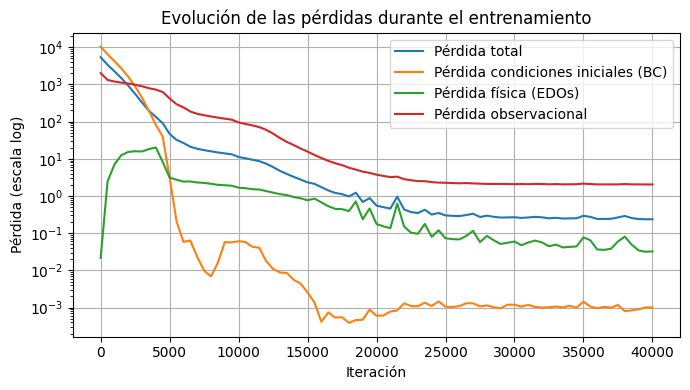

In [78]:
# Índices de iteración cada 500 pasos
step = 500
iters = list(range(0, len(loss_total_list), step))

# Submuestreo de las listas de pérdidas
loss_total_sub = loss_total_list[::step]
loss_bc_sub = loss_bc_list[::step]
loss_phys_sub = loss_phys_list[::step]
loss_obs_sub = loss_obs_list[::step]

# Gráfica de pérdidas
plt.figure(figsize=(7, 4))
plt.plot(iters, loss_total_sub, label='Pérdida total')
plt.plot(iters, loss_bc_sub, label='Pérdida condiciones iniciales (BC)')
plt.plot(iters, loss_phys_sub, label='Pérdida física (EDOs)')
plt.plot(iters, loss_obs_sub, label='Pérdida observacional')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Pérdida (escala log)')
plt.title('Evolución de las pérdidas durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()